# Estatística Descritiva


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import os

os.getcwd()

'c:\\PythonDSA\\Conceitos'

In [3]:
df = pd.read_csv('arquivos/imoveis.csv')

df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


## Análise Exploratória - Resumo Estatístico    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [5]:
# Transfirmando codigo de bairro para categórico
df['codigo_bairro'] = df['codigo_bairro'].astype('category')
df['codigo_localidade'] = df['codigo_localidade'].astype('category')


In [6]:
# Verificar se há valores nulos
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [7]:
# Resumo Estatístico
df.describe().round(1)

df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [8]:
cols = df.describe().round(1).columns

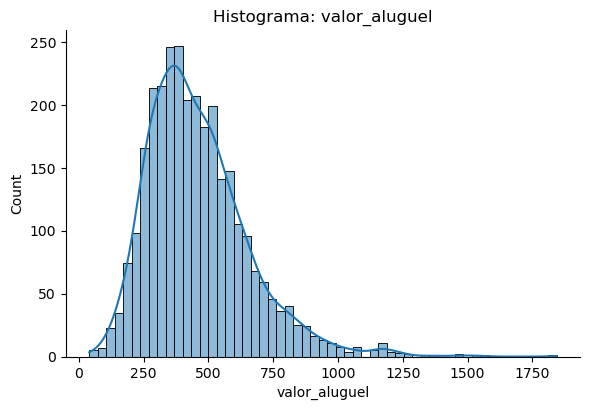

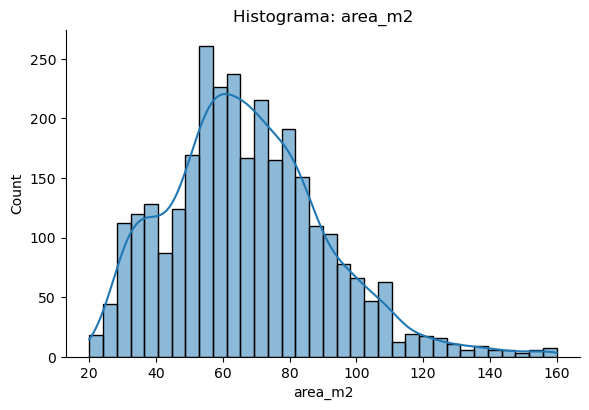

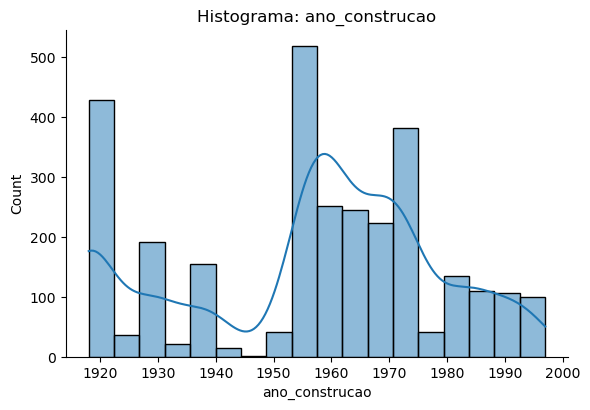

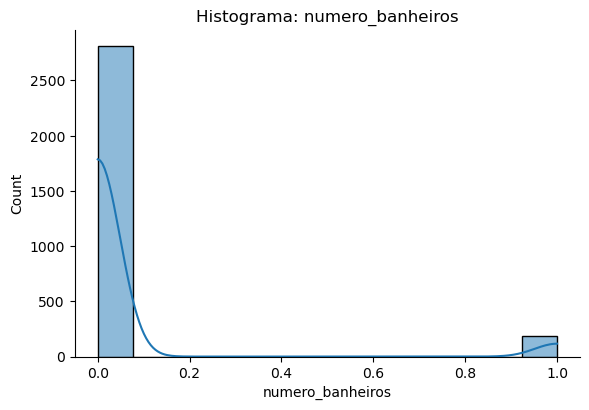

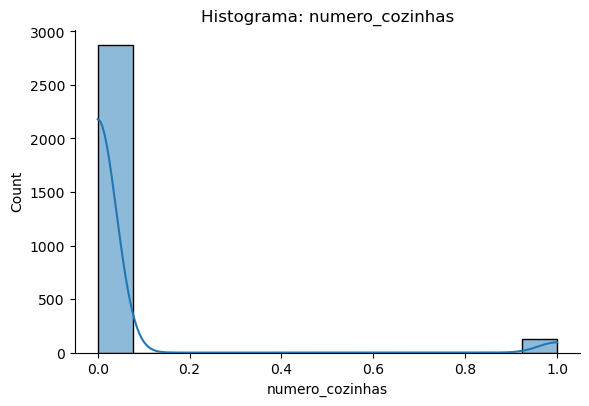

In [24]:

# Plotar com displot em grid
for col in cols:
    sns.displot(data=df, x=col, kde=True, height=4, aspect=1.5)
    plt.title(f'Histograma: {col}')
    plt.show()

In [25]:
df['codigo_bairro'].unique()

[1112, 2114, 2148, 2222, 2211, ..., 2223, 1344, 2031, 1233, 1925]
Length: 336
Categories (336, int64): [113, 121, 122, 124, ..., 2526, 2527, 2528, 2529]

In [32]:
#   Média de aluguel por bairro
df.groupby("codigo_localidade")["valor_aluguel"].mean().reset_index(name="Media")


,codigo_localidade,Media
0,1,435.759094
1,2,484.009110
2,3,635.119435


In [10]:
df.groupby(['codigo_localidade']).agg(
    n=('valor_aluguel', 'count'),
    Media=('valor_aluguel', 'mean'),
    DevioPadrao = ('valor_aluguel','std')
).reset_index().query("n>0")

,codigo_localidade,n,Media,DevioPadrao
0,1,1753,435.759094,167.594853
1,2,1171,484.009110,218.980695
2,3,76,635.119435,275.720266


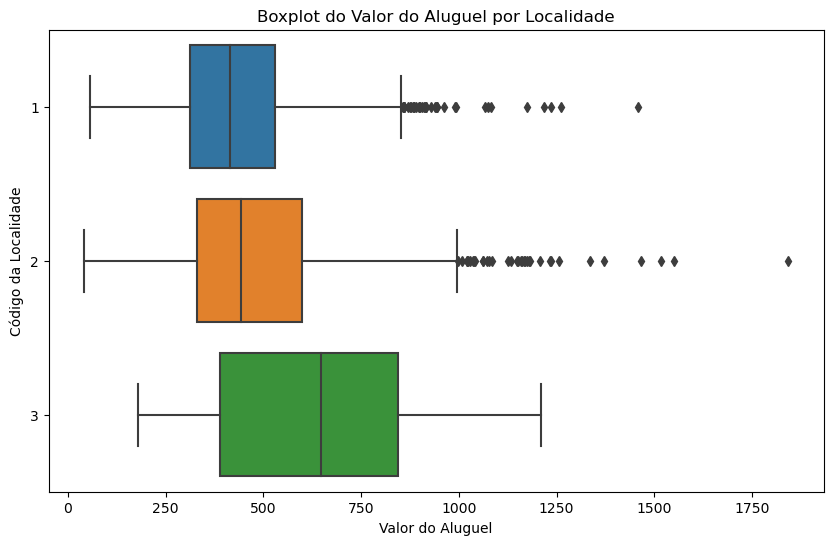

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='codigo_localidade', x='valor_aluguel', data=df)
plt.ylabel('Código da Localidade')
plt.xlabel('Valor do Aluguel')
plt.title('Boxplot do Valor do Aluguel por Localidade')
plt.show()

A análise dos valores de aluguel por localidade revela diferenças significativas entre as três regiões. A localidade 1 apresenta o maior número de registros (1.753), com média de aluguel mais baixa (R$ 435,76) e variação moderada nos preços (desvio padrão de R$ 167,59), indicando uma maior uniformidade nos valores praticados. A localidade 2, com 1.171 observações, possui uma média de aluguel um pouco superior (R$ 484,01) e maior dispersão (desvio padrão de R$ 218,98), sugerindo uma diversidade maior nos preços dos imóveis. Já a localidade 3 possui a média de aluguel mais alta (R$ 635,12) e a maior variabilidade (desvio padrão de R$ 275,72), porém conta com apenas 76 registros, o que limita a confiabilidade das conclusões. Esses dados indicam que localidade 1 tende a ser mais acessível, enquanto a 3 é mais cara e heterogênea, ainda que baseada em uma amostra pequena.

In [23]:
# Análise por código de bairro
total_bairro = df.groupby(['codigo_localidade', 'codigo_bairro']).agg(
    n=('valor_aluguel', 'count'),
    Media=('valor_aluguel', 'mean')
).reset_index().query("n>0")

total_bairro

,codigo_localidade,codigo_bairro,n,Media
2,1,122,1,271.538450
3,1,124,1,422.820530
7,1,152,2,429.410240
10,1,163,10,518.830767
11,1,210,1,483.025670
...,...,...,...,...
937,3,1954,2,664.769230
938,3,1955,7,726.468876
955,3,2112,1,800.769200
962,3,2133,3,705.897463


In [30]:
df['codigo_bairro'].unique()

[1112, 2114, 2148, 2222, 2211, ..., 2223, 1344, 2031, 1233, 1925]
Length: 336
Categories (336, int64): [113, 121, 122, 124, ..., 2526, 2527, 2528, 2529]

In [27]:
total_bairro.groupby(['n']).size().reset_index().head()

,n,0
0,1,103
1,2,65
2,3,42
3,4,41
4,5,29


A tentativa de realizar uma análise mais detalhada por codigo_bairro mostrou-se pouco conclusiva. Embora existam 336 bairros distintos no conjunto de dados, a maioria possui uma amostra extremamente pequena: 103 bairros possuem apenas 1 observação, 65 bairros têm 2, e 42 possuem 3 registros. Essa distribuição assimétrica compromete a robustez de análises estatísticas baseadas nessa variável. Portanto, recomenda-se não utilizar o código de bairro em análises estatísticas mais avançadas, como modelos de regressão, devido à alta dispersão e baixa representatividade da maioria das categorias.

In [47]:
# Matriz de correlação
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000


In [48]:
df.corr()['valor_aluguel'].sort_values(ascending = False)

valor_aluguel        1.000000
area_m2              0.584878
numero_banheiros     0.250261
codigo_localidade    0.172368
numero_cozinhas      0.170707
ano_construcao       0.139194
Name: valor_aluguel, dtype: float64

Entre as variáveis analisadas, área do imóvel é o principal fator associado ao valor do aluguel (0,58), seguido a distância por número de banheiros. As demais variáveis apresentam correlações fracas, o que indica que, embora possam contribuir para explicar os valores de aluguel, seu impacto é menos relevante do ponto de vista linear.

In [49]:
# Para calcular somente a correlação entre área e valor de aluguel
df.corr()['valor_aluguel']['area_m2']

0.5848780677553321

## Conclusão 

Com base nos dados disponíveis, foi realizada uma análise descritiva das variáveis relacionadas aos valores de aluguel de imóveis. O conjunto de dados contém 3.000 observações e está completo, sem valores ausentes. As variáveis incluem características dos imóveis como área, ano de construção, número de banheiros e cozinhas, além de códigos de localização e bairro.